In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#our dataset
data=pd.read_table('fruit_data_with_colors.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


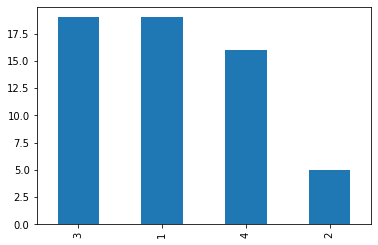

In [3]:
data['fruit_label'].value_counts().plot(kind='bar')

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
#checking how many unique fruit names are present in the dataset
data['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [7]:
apple_data=data[data['fruit_name']=='apple']
orange_data=data[data['fruit_name']=='orange']
lemon_data=data[data['fruit_name']=='lemon']
mandarin_data=data[data['fruit_name']=='mandarin']

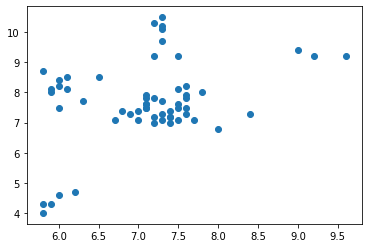

In [8]:
plt.scatter(data['width'],data['height'])

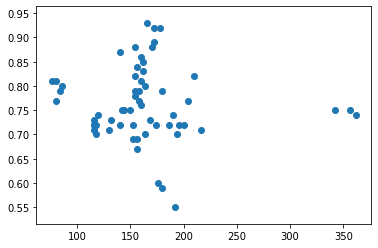

In [9]:
plt.scatter(data['mass'],data['color_score'])

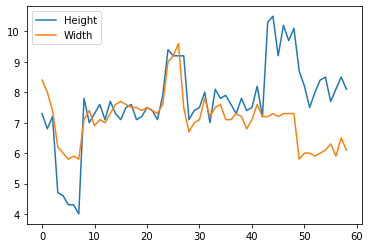

In [10]:
plt.plot(data['height'],label='Height')
plt.plot(data['width'],label='Width')
plt.legend()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X=data[['mass','width','height']]
Y=data['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0, stratify = Y)

In [13]:
knn=KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
knn.score(X_train,y_train)

0.7727272727272727

In [16]:
knn.score(X_test,y_test)

0.5333333333333333

In [17]:
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\sklearn\neighbors\_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\sklearn\neighbors\_base.py:604: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'lemon'